# Batch Lever Press Analysis

### Notebook for processing and analyzing lever press behavior
Allows for processing, summarizing, and analysis of lever behavior across all sessions, and across multiple mice. Includes sections for data visualization 

In [1]:
# Import modules
import os
import numpy as np
from Lab_Analyses.Behavior.mouse_lever_behavior import analyze_mouse_lever_behavior
from Lab_Analyses.Behavior.group_lever_press import Group_Lever_Press
from Lab_Analyses.Behavior import behavior_plotting as bplot
from Lab_Analyses.Utilities.save_load_pickle import save_pickle, load_pickle

## Across Day Batch Processing and Summarizing
Sections below are for analyzing all sessions across all days of a standard lever press training regime. 


### Specify the data to be analyzed
#### Paths
Specify the paths where data files are located

In [2]:
# Parent path leading to where raw dispatcher and xsglog files are loacted
raw_path = r'Z:\People\Jake\Behavior'
#raw_path = r"C:\Users\Jake\Desktop\temp_behavior"
# Parent path leading to where analyzed data are saved
save_path = r'C:\Users\Jake\Desktop\Analyzed_data\individual'

#### Datasets
Specify what data to be processed and analyzed as well as other parameters associated with the data

In [176]:
# Mouse ids you wish to analyze
## Can have as many different ids as needed
id_1 = "JW187"
id_2 = "JW188"
id_3 = "JW173"
id_4 = "JW174"
id_5 = "BM053" # Not using
id_6 = "BM054" # Not using
id_7 = "JW196" # Not using
id_8 = "JW197" # Not using
id_9 = "JW198" # Not using
id_10 = "JW199" # Not using
id_11 = "BM060" # Not using
id_12 = "JW234"
id_13 = "JW239"
id_14 = "JW245"
id_15 = "JW246"
id_16 = "JW247"
id_17 = "JW248"

## Reanalyze ?
# Indicate if you are reanalyzing the data
# Will re-process, summarize, and analyze data even if already analyzed before
reanalyze = [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
reanalyze = [not x for x in reanalyze]

## Ignore days ?
# Indicate if there are any days for each mouse you wish to ignore for analysis
# For example you did another session unrelated to this task (e.g. opto)
ignore_1 = ()
ignore_2 = ()
ignore_3 = ()
ignore_4 = ()
ignore_5 = ()
ignore_6 = ()
ignore_7 = ()
ignore_8 = ()
ignore_9 = ()
ignore_10 = ()
ignore_11 = ()
ignore_12 = ()
ignore_13 = ()
ignore_14 = ()
ignore_15 = ()
ignore_16 = ()
ignore_17 = ()

# Imaged Sessions
## Indicate which sessions were imaged

#### Number of sessiosn
num_of_sessions = 14
#### Put which sessions were imaged in the lists (must be int)
im_1 = []
im_2 = []
im_3 = []
im_4 = []
im_5 = []
im_6 = []
im_7 = [1,7,14]
im_8 = [1,7,14]
im_9 = [1,7,14]
im_10 = [1,7,14]
im_11 = []
im_12 = []
im_13 = []
im_14 = []
im_15 = []
im_16 = []
im_17 = []


#### Do not change this part
image_1 = [False if x not in np.array(im_1)-1 else True for x in range(num_of_sessions)]
image_2 = [False if x not in np.array(im_2)-1 else True for x in range(num_of_sessions)]
image_3 = [False if x not in np.array(im_3)-1 else True for x in range(num_of_sessions)]
image_4 = [False if x not in np.array(im_4)-1 else True for x in range(num_of_sessions)]
image_5 = [False if x not in np.array(im_5)-1 else True for x in range(num_of_sessions)]
image_6 = [False if x not in np.array(im_6)-1 else True for x in range(num_of_sessions)]
image_7 = [False if x not in np.array(im_7)-1 else True for x in range(num_of_sessions)]
image_8 = [False if x not in np.array(im_8)-1 else True for x in range(num_of_sessions)]
image_9 = [False if x not in np.array(im_9)-1 else True for x in range(num_of_sessions)]
image_10 = [False if x not in np.array(im_10)-1 else True for x in range(num_of_sessions)]
image_11 = [False if x not in np.array(im_11)-1 else True for x in range(num_of_sessions)]
image_12 = [False if x not in np.array(im_12)-1 else True for x in range(num_of_sessions)]
image_13 = [False if x not in np.array(im_13)-1 else True for x in range(num_of_sessions)]
image_14 = [False if x not in np.array(im_14)-1 else True for x in range(num_of_sessions)]
image_15 = [False if x not in np.array(im_15)-1 else True for x in range(num_of_sessions)]
image_16 = [False if x not in np.array(im_16)-1 else True for x in range(num_of_sessions)]
image_17 = [False if x not in np.array(im_17)-1 else True for x in range(num_of_sessions)]


# Give info about the experiment for each mouse
## Optional. Set to none below if not being used
exp_1 = "paAIP2 Behavior"
exp_2 = "paAIP2 Behavior"
exp_3 = "paAIP2 Behavior"
exp_4 = "paAIP2 Behavior"
exp_5 = "paAIP2 Behavior"
exp_6 = "paAIP2 Behaivor"
exp_7 = "paAIP2 Behaivor"
exp_8 = "paAIP2 Behaivor"
exp_9 = "paAIP2 Behaivor"
exp_10 = "paAIP2 Behaivor"
exp_11 = "paAIP2 Behaivor"
exp_12 = "paAIP2 Behaivor"
exp_13 = "paAIP2 Behaivor"
exp_14 = "paAIP2 Behaivor"
exp_15 = "paAIP2 Behaivor"
exp_16 = "paAIP2 Behaivor"
exp_17 = "paAIP2 Behavior"


# Put information for each mouse in a list
### Can be just one mouse in the list

mouse_ids = [id_1, id_2, id_3, id_4, id_7, id_8, id_9, id_10, id_12, id_13, id_14, id_15, id_17]
imaged = [image_1, image_2, image_3, image_4, image_7, image_8, image_9, image_10, image_12, image_13, image_14, image_15, image_17]
exps = [exp_1, exp_2, exp_3, exp_4, exp_7, exp_8, exp_9, exp_10, exp_12,exp_13, exp_14, exp_15, exp_17]
ignore_dirs = [ignore_1, ignore_2, ignore_3, ignore_4, ignore_7, ignore_8, ignore_9, ignore_10, ignore_12, ignore_13, ignore_14, ignore_15, ignore_17]
mouse_ids = [id_1, id_2, id_3, id_4, id_12, id_13, id_14, id_15, id_17]

### Process and Summarize each dataset

In [177]:
summed_data = []
for mouse_id, img, exp, reanaly, ignore in zip(mouse_ids, imaged, exps, reanalyze, ignore_dirs):
    print(mouse_id)
    path = os.path.join(raw_path, mouse_id)
    sd = analyze_mouse_lever_behavior(
        mouse_id=mouse_id, path=path, imaged=img, save=True, save_suffix=None, reanalyze=reanaly, 
        ignore_dir=ignore, press_len=0.5
    )
    summed_data.append(sd)

JW187
----------------------------
Analyzing Mouse JW187
 - Loading previously analyzed data
JW188
----------------------------
Analyzing Mouse JW188
 - Loading previously analyzed data
JW173
----------------------------
Analyzing Mouse JW173
 - Loading previously analyzed data
JW174
----------------------------
Analyzing Mouse JW174
 - Loading previously analyzed data
JW234
----------------------------
Analyzing Mouse JW234
 - Loading previously analyzed data
JW239
----------------------------
Analyzing Mouse JW239
 - Loading previously analyzed data
JW245
----------------------------
Analyzing Mouse JW245
 - Loading previously analyzed data
JW246
----------------------------
Analyzing Mouse JW246
 - Loading previously analyzed data
JW248
----------------------------
Analyzing Mouse JW248
 - Loading previously analyzed data


### Or load specific files
Give path and name for specific files you wish to load.  
Change the cell below to run the code

path = r'C:\Users\Jake\Desktop\Analyzed_data\individual'  
fname = "JW041_all_lever_data"  
loaded_data = load_pickle([fname], path)  

## Grouped analysis
Section to group data across mice within the same experimental group

In [178]:
# Parent path for where grouped data is stored
group_path = r'C:\Users\Jake\Desktop\Analyzed_data\grouped'
# Specify specific paths for this group
experiment_directory = "paAIP2_Behavior"
group_directory = "EGFP"
# Specify the name of the group file
group_name = f"{group_directory}_{experiment_directory}_lever_press_data"

# Specify if you would like to load or regenerate the grouped data
load_data = False
# Specify if you would like to save the grouped data
save_grouped = True

# Group Data
if load_data is True:
    load_path = os.path.join(group_path, experiment_directory, group_directory)
    try:
        grouped_data = load_pickle([group_name],load_path)
        grouped_data = grouped_data[0]
        print("Grouped file loaded")
    except FileNotFoundError:
        print("Grouped file not found. Regenerating...")    
        grouped_data = Group_Lever_Press(summed_data)
else:
    grouped_data = Group_Lever_Press(summed_data)

if save_grouped is True:
    save_path = os.path.join(group_path, experiment_directory, group_directory)
    if not os.path.isdir(save_path):
        os.makedirs(save_path)
    save_pickle(group_name, grouped_data, save_path)
        


# Visualize Data
Uses built in plotting methods of the Group_Lever_Press class.  
If you wish to visualize only a single animal's data across sessions it can still be put into a Group_Lever_Press class for plotting

grouped_data = Group_Lever_Press() # Put individual mouse data inside to visualize a single mouse

### Visualize data across sessions

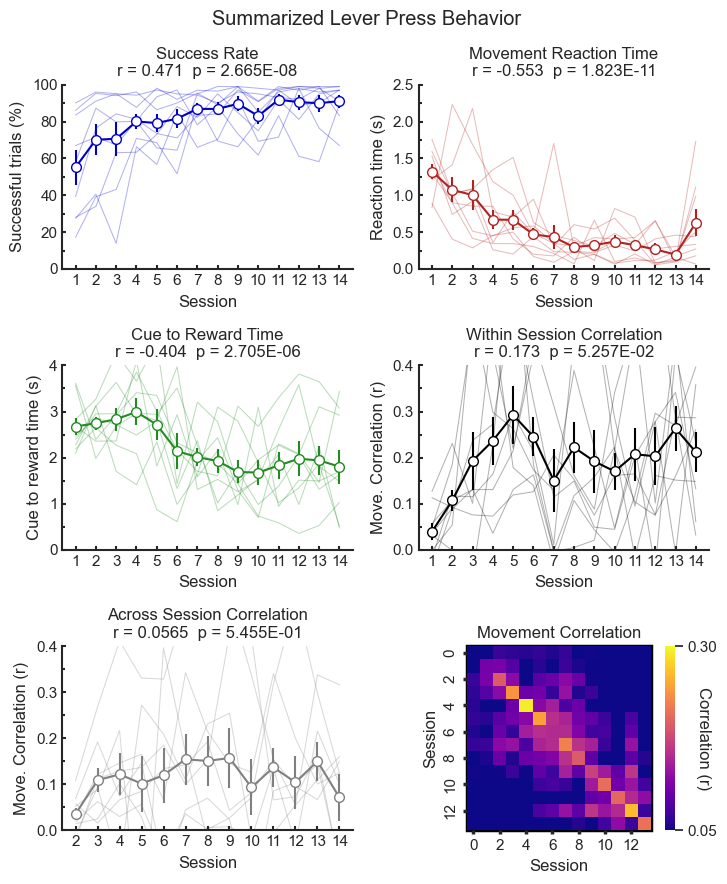

In [179]:
figure_path = r'C:\Users\Jake\Desktop\Figures'

# Specify if you want to save grouped figures
group_fig_save = False
group_fig_path = os.path.join(figure_path, "grouped_data", experiment_directory, group_directory)
if not os.path.isdir(group_fig_path):
    os.makedirs(group_fig_path)

# Plot the grouped data
colors = {"success": "mediumblue", "reaction_time": "firebrick", "cue_to_reward": "forestgreen", 
          "within": "black", "across":"grey", "cmap": "plasma"}
ylims = {"success": (0,100), "reaction_time": (0,2.5), "cue_to_reward": (0,4), 
         "within": (0,0.4), "across": (0,0.4), "cmap": (0.05, 0.3)}
grouped_data.plot_data(figsize=(7.5,9), colors=colors, plot_ind=True, ylims=ylims, save=group_fig_save, save_path=group_fig_path)

### Visualize single session lever presses

In [180]:
# specify which mouse and which session to plot
mouse = summed_data[0]
session = 12

# Specify if you want to save the figure
save_press = False
individual_lever_path = os.path.join(figure_path, "individual_mice", mouse.mouse_id)
if not os.path.isdir(individual_lever_path):
    os.mkdir(individual_lever_path)
    
# Plot the lever press traces
bplot.plot_session_rewarded_lever_presses(mouse, session, x_lim=(0,2400), figsize=(4,5), 
                                          save=save_press, save_path=individual_lever_path)

AttributeError: module 'Lab_Analyses.Behavior.behavior_plotting' has no attribute 'plot_session_rewarded_lever_presses'

In [181]:
d = summed_data[0]

In [182]:
d.__dict__.keys()

dict_keys(['mouse_id', 'experiment', 'sessions', 'trials', 'rewards', 'used_trials', 'all_movements', 'corr_movements', 'average_movements', 'reaction_time', 'cue_to_reward', 'move_at_start_faults', 'move_duration_before_cue', 'number_movements_during_ITI', 'fraction_ITI_moving', 'correlation_matrix', 'within_sess_corr', 'across_sess_corr'])

In [183]:
d.corr_movements[3].shape

(98, 2601)

In [188]:
group_path = r'C:\Users\Jake\Desktop\Analyzed_data\grouped'
# Specify specific paths for this group
experiment_directory = "paAIP2_Behavior"
group_directory = "EGFP"
# Specify the name of the group file
group_name = f"{group_directory}_{experiment_directory}_lever_press_data"

# Specify if you would like to load or regenerate the grouped data
load_data = True
# Specify if you would like to save the grouped data
save_grouped = False

# Group Data
if load_data is True:
    load_path = os.path.join(group_path, experiment_directory, group_directory)
    try:
        egfp_data = load_pickle([group_name],load_path)
        egfp_data = egfp_data[0]
        print("Loaded")
    except:
        pass

Loaded


In [189]:
group_path = r'C:\Users\Jake\Desktop\Analyzed_data\grouped'
# Specify specific paths for this group
experiment_directory = "paAIP2_Population"
group_directory = "paAIP2"
# Specify the name of the group file
group_name = f"{group_directory}_{experiment_directory}_lever_press_data"

# Specify if you would like to load or regenerate the grouped data
load_data = True
# Specify if you would like to save the grouped data
save_grouped = False

# Group Data
if load_data is True:
    load_path = os.path.join(group_path, experiment_directory, group_directory)
    try:
        pa_data = load_pickle([group_name],load_path)
        pa_data = pa_data[0]
        print("Grouped file loaded")
    except FileNotFoundError:
        print("Grouped file not found. Regenerating...")    



Grouped file loaded


In [190]:
from Lab_Analyses.Behavior.behavior_plotting import plot_multi_group_lever_behavior

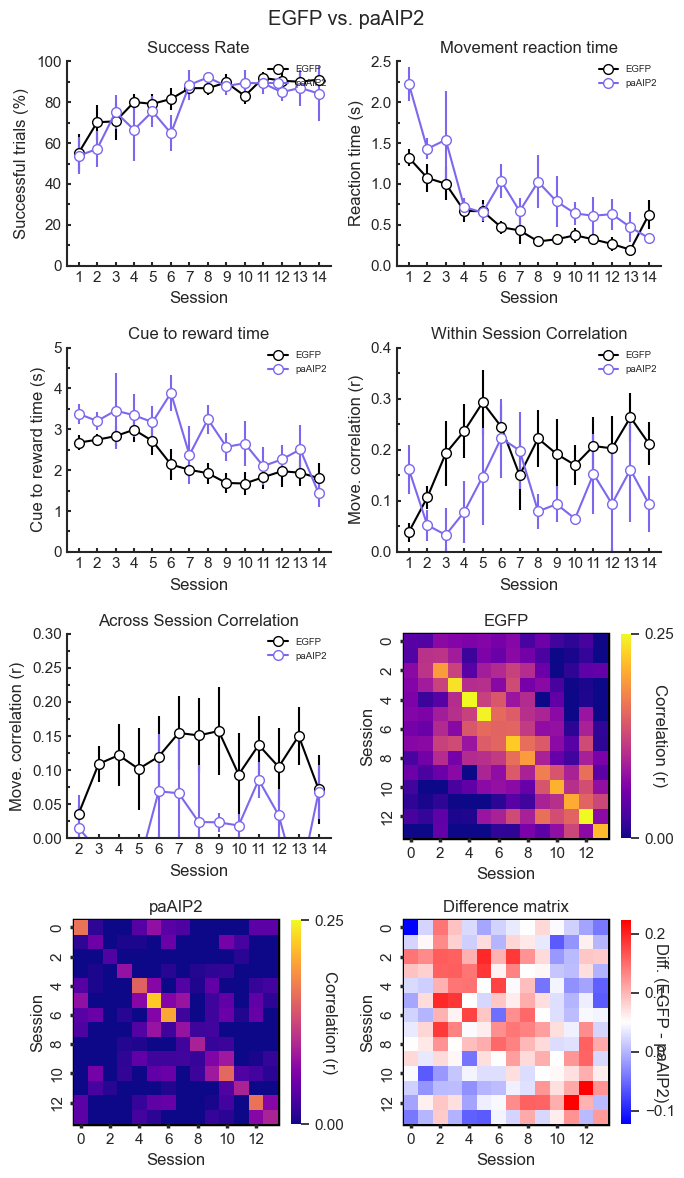

In [194]:
group_fig_path = r"C:\Users\Jake\Desktop\Figures\grouped"
ylims = {"success": (0,100), "reaction_time": (0,2.5), "cue_to_reward": (0,5), 
         "within": (0,0.4), "across": (0,0.3), "cmap": (0.0, 0.25)}
plot_multi_group_lever_behavior(
    data_dict={"EGFP": egfp_data, "paAIP2": pa_data},
    figsize=(7, 12),
    main_title="EGFP vs. paAIP2",
    colors=["black", "mediumslateblue"],
    ylims=ylims,
    save=False,
    save_path=group_fig_path,
)